# k-최근접 이웃회귀의 한계
- 데이터 범위 밖의 새로운 데이터는 예측이 불가능

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import warnings
from sklearn.linear_model import LinearRegression

warnings.simplefilter(action='ignore', category=FutureWarning)
# FutureWarning제거

%matplotlib inline

mpl.rcParams['font.family'] = 'D2coding'  # 한글 깨짐 해결

In [22]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4,
                         18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0,
                         22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0,
                         24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0,
                         28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0,
                         39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0,
                         78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0,
                         130.0, 135.0, 110.0, 130.0, 150.0,
                         145.0, 150.0, 170.0, 225.0, 145.0,
                         188.0, 180.0, 197.0, 218.0, 300.0,
                         260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0, 685.0,
                         700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0,
                         1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

In [23]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [24]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [25]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [26]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [5]:
# k = 3 변경
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[50]])

array([1033.33333333])

In [27]:
distances, indexs = knr.kneighbors([[50]])

In [28]:
distances

array([[6., 7., 7.]])

In [29]:
indexs

array([[34,  8, 14]], dtype=int64)

In [7]:
# 길이가 50cm인 생선의 주변 이웃
distances, indexs = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs],train_target[indexs], marker='D')
plt.scatter(50, 1033, marker='^')

plt.title('학습된 데이터 범위 밖의 데이터는 예측을 할수 없다')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
# Linear Regression 알고리즘
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [9]:
lr.predict([[50]])

array([1241.83860323])

In [10]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


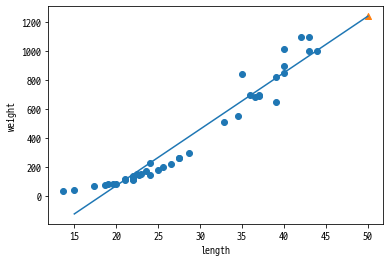

In [12]:
plt.scatter(train_input, train_target)

# 15 ~ 50길이의 직선 
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# 다항회귀

In [14]:
# 2차 방정식 그래프를 그리기 위해 길이를 제곱한 항을 추가하는 작업을 진행해야 한다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [15]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [21]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [16]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [17]:
print(lr.predict([[50**2, 50]]))   ## 왜 [[]] 이렇게 쓰지

[1573.98423528]


In [18]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


- 무게 = 1.01 * 길이<sup>2</sup> + -21.6 * 길이 + 116.05

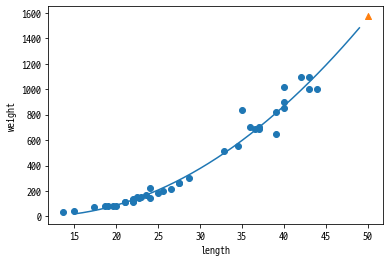

In [19]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

# 15 ~ 50길이의 직선 
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # test가 더 높으면 - 과소적합이야.. (이건 나쁘지 않다...맞긴해..)

0.9706807451768623
0.9775935108325121


# 특성공학과 규제

## 다중회귀(Multiple Regression)
- 여러 개의 특성을 사용한 선형회귀 알고리즘
- 특성공학 : 기존의 특성을 사용해 새로운 특성을 뽑아내는 것을 말한다. 
- https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')

In [31]:
raw = df.to_numpy()

In [32]:
# 생선의 길이, 높이, 두께를 이용한 회귀분석
raw

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [33]:
# target data
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 훈련 세트와 테스트 세트로 분리

In [39]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    raw, weight, random_state=42)

### 사이킷런 변환기

In [34]:
# 다항식 변환기
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures : 현재 데이터를 다항식의 형태로 변경하는 역할을 수행 

In [40]:
poly = PolynomialFeatures()
poly.fit([[2, 3]]) # 2와 3으로 몇개의 조합을 만들 수 있는지 찾는 것이다
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

- 무게 = a*길이 + b*높이 + c*두께 + 1 # 선형 다중회귀는 값이 1인 특성과 곱해지는 계수라고 본다. 1*절편,,?

In [36]:
poly = PolynomialFeatures(include_bias = False) # 1을 빼고 transform하게 해줌.
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [41]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)  # 길이,높이,두께 이용해서 특성을 늘렸다.
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [42]:
# 컬럼명 추출
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [43]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)


LinearRegression()

In [45]:
lr.score(train_poly, train_target) # 결정계수

0.9903183436982125

In [46]:
lr.score(test_poly, test_target)

0.9714559911594155

In [48]:
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [49]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target) # 너무 훈련데이터에 집중 --> 과대적합발생

0.9999999999938143

In [50]:
lr.score(test_poly, test_target) # -144.407... 특성이 너무 많아도 안좋다. --> 과대적합발생 

-144.40744532797535

- 훈련데이터가 너무 과대해지면서 과대적합이 발생한다.

### 규제 : 머신러닝 모델의 훈련센트를 너무 과도하게 학습하지 못하도록 훼방하는 것
- 모델이 훈련세트에 과대적합되지 않도록 만드는 것 
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게만드는 일이다.

In [51]:
from sklearn.preprocessing import StandardScaler  # ss 이용해서 표준점수로 바꿈.
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지회귀

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [53]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


- 릿지 회귀(Ridge Regression) 모델 : 계수를 제곱한 값을 기준으로 규제 적용
- 라쏘 회귀(Lasso Regression) 모델 : 계수의 절대값을 기준으로 규제 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있어서 일반적으로 릿지를 조금 더 선호한다.
- alpha : 릿지와 라쏘 모델을 사용하 때 규제의 양을 임의로 조절하는 하이퍼파라미터
- alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합이 되도록 유도한다.
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다. 
- 하이퍼 파라미터(Hyperparameter) : 머신러닝 모델이 학습ㅎ라 수 없고 사람이 알려줘야하는 파라미터

In [63]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점의 최적의 alpha값이 된다. 
train_score = []
test_score = []

alpha_list =[0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지모델
    ridge = Ridge(alpha=alpha)
    # 릿지모델 훈련
    ridge.fit(train_scaled, train_target)
    # 결정계수(R2 score)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))    

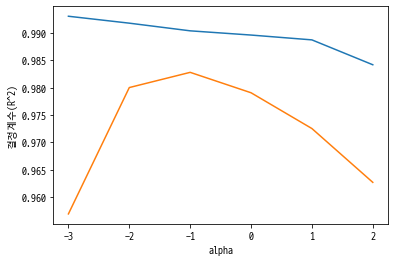

In [64]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수(R^2)')
plt.show()

- 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 지점 -1, 10^-1 = 0.1

In [65]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


### 라쏘 회귀

In [67]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [71]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점의 최적의 alpha값이 된다. 
train_score = []
test_score = []

alpha_list =[0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지모델
    lasso = Lasso(alpha=alpha)
    # 릿지모델 훈련
    lasso.fit(train_scaled, train_target)
    # 결정계수(R2 score)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))    

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


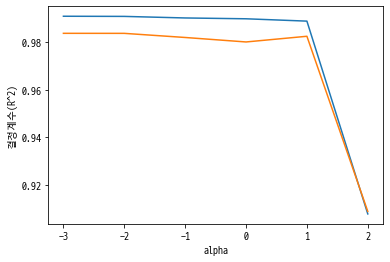

In [72]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수(R^2)')
plt.show()

In [69]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [70]:
np.sum(lasso.coef_ == 0)  # lasso.coef_ 는 계수값을 만드는 거 

40

# 실습문제 : 보스턴 집값 예측 

In [73]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [144]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03

In [162]:
df['Price'] = boston.target
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [75]:
boston.feature_names # 특성요소

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [83]:
boston.data # 특성의 값인듯??

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [84]:
boston.target # 이게 집값인거같은데 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [85]:
train_input, test_input, train_target, test_target = train_test_split(boston.data, boston.target, random_state=3)

In [86]:
train_input

array([[1.31100e-02, 9.00000e+01, 1.22000e+00, ..., 1.79000e+01,
        3.95930e+02, 4.81000e+00],
       [8.20058e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.50000e+00, 1.69400e+01],
       [3.30600e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96140e+02, 8.51000e+00],
       ...,
       [1.90730e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
        3.93740e+02, 6.56000e+00],
       [1.12658e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.43280e+02, 1.21200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.80790e+02, 1.01900e+01]])

In [175]:
train_target

array([35.4, 13.5, 20.6, 24.7, 21.9, 17.1, 23.6, 21.1, 15.6, 18.5,  8.3,
       14.5, 23.9, 11.8, 24.6, 24.8, 18.7, 17.9, 48.8, 13. , 29.6, 18. ,
       20.1, 17.3, 23.1, 22.6, 13.8, 43.8, 35.2, 22.6, 17.4, 48.5, 31.5,
       15.6, 14.2, 20.6, 22. , 20.1, 17.6, 23.7, 14.1, 19.8, 24.4, 33.4,
       39.8, 34.9, 24.8, 14.6, 23.4, 33.8, 23.9,  9.6, 21.8, 31.6, 14.5,
        7.2, 24.1, 21.4, 17.2, 46. , 23.1, 14.5, 20.5, 17. , 48.3, 30.5,
       20.6, 20.2, 27.1, 19.7, 24.7, 31.1, 22.3, 29.8, 13.6, 28.7, 21.4,
       13.4, 16.6, 20. , 24.2, 20.6, 20.3, 12.7, 18.9, 17.8,  7. , 16.1,
       22.5, 18.3, 13.9, 50. , 50. , 13.8, 23.5, 32.2, 19.3,  9.5, 22.2,
       24.5, 12.1, 20.1, 23.2, 19.1, 43.5, 17.4, 19.6, 20.8, 36.1, 14.1,
       25.1,  7.5, 11.9, 23.3, 21.4, 46.7, 25.3, 36.2, 20.3, 23.8, 14. ,
       20.9, 33. , 19.8, 19.4, 35.1, 20.4, 22.6,  7.2, 18.3, 22.9, 43.1,
       28.4, 30.1, 20.5, 21.2,  8.5, 19.6, 28.5, 50. , 19. , 22.8, 14.3,
       23. , 15.6, 29. , 26.4, 34.9, 26.6, 23.7,  8

### 사이킷런 변환기

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [147]:
poly = PolynomialFeatures(degree=2, include_bias = False)
poly.fit(train_input) # 특성을 늘린다.
train_poly = poly.transform(train_input)
train_poly.shape

(379, 104)

In [148]:
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x12',
 '

In [149]:
test_poly = poly.transform(test_input)

In [150]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [151]:
lr.score(train_poly, train_target)

0.9342342973705087

In [152]:
lr.score(test_poly, test_target)

0.8444625548887685

In [ ]:
# degree = 2를 하니까 score가 낮다. 3을 하면 과대적합
# 따라서 규제를 하자 

In [153]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [154]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9112230126065787


In [155]:
print(ridge.score(test_scaled, test_target))

0.8671586444792245


In [156]:
# 훈련세트와 테스트 세트의 점수가 가장 가까운 지점의 최적의 alpha
train_score = []
test_score = []

alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

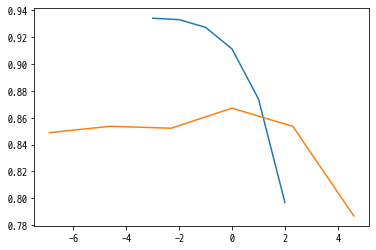

In [157]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log(alpha_list), test_score)
plt.show()

In [158]:
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.8739879819605196
0.853570972574718


In [163]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(np.round(lr.coef_,1), lr.intercept_)  # 회귀계수값 

[ -0.1   0.1  -0.    3.3 -15.8   3.4   0.   -1.3   0.3  -0.   -1.    0.
  -0.5] 36.38321531227381


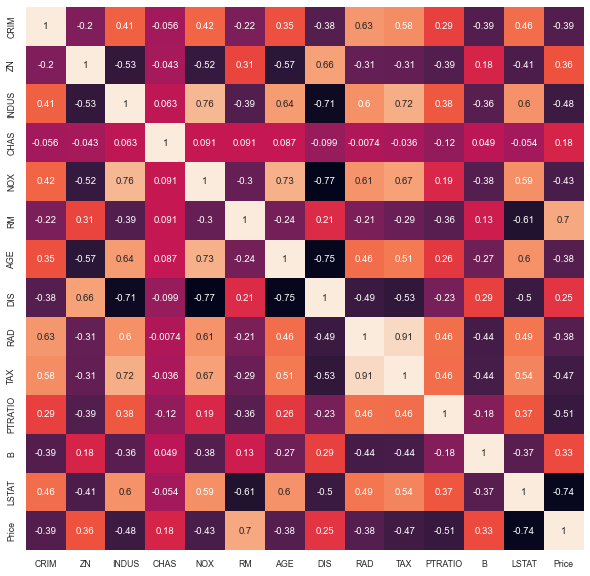

In [166]:
# 상관계수 
df_corr=df.corr()
df_corr
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [169]:
corr_order = df.corr().loc[:'LSTAT','Price'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64

In [170]:
import seaborn as sns

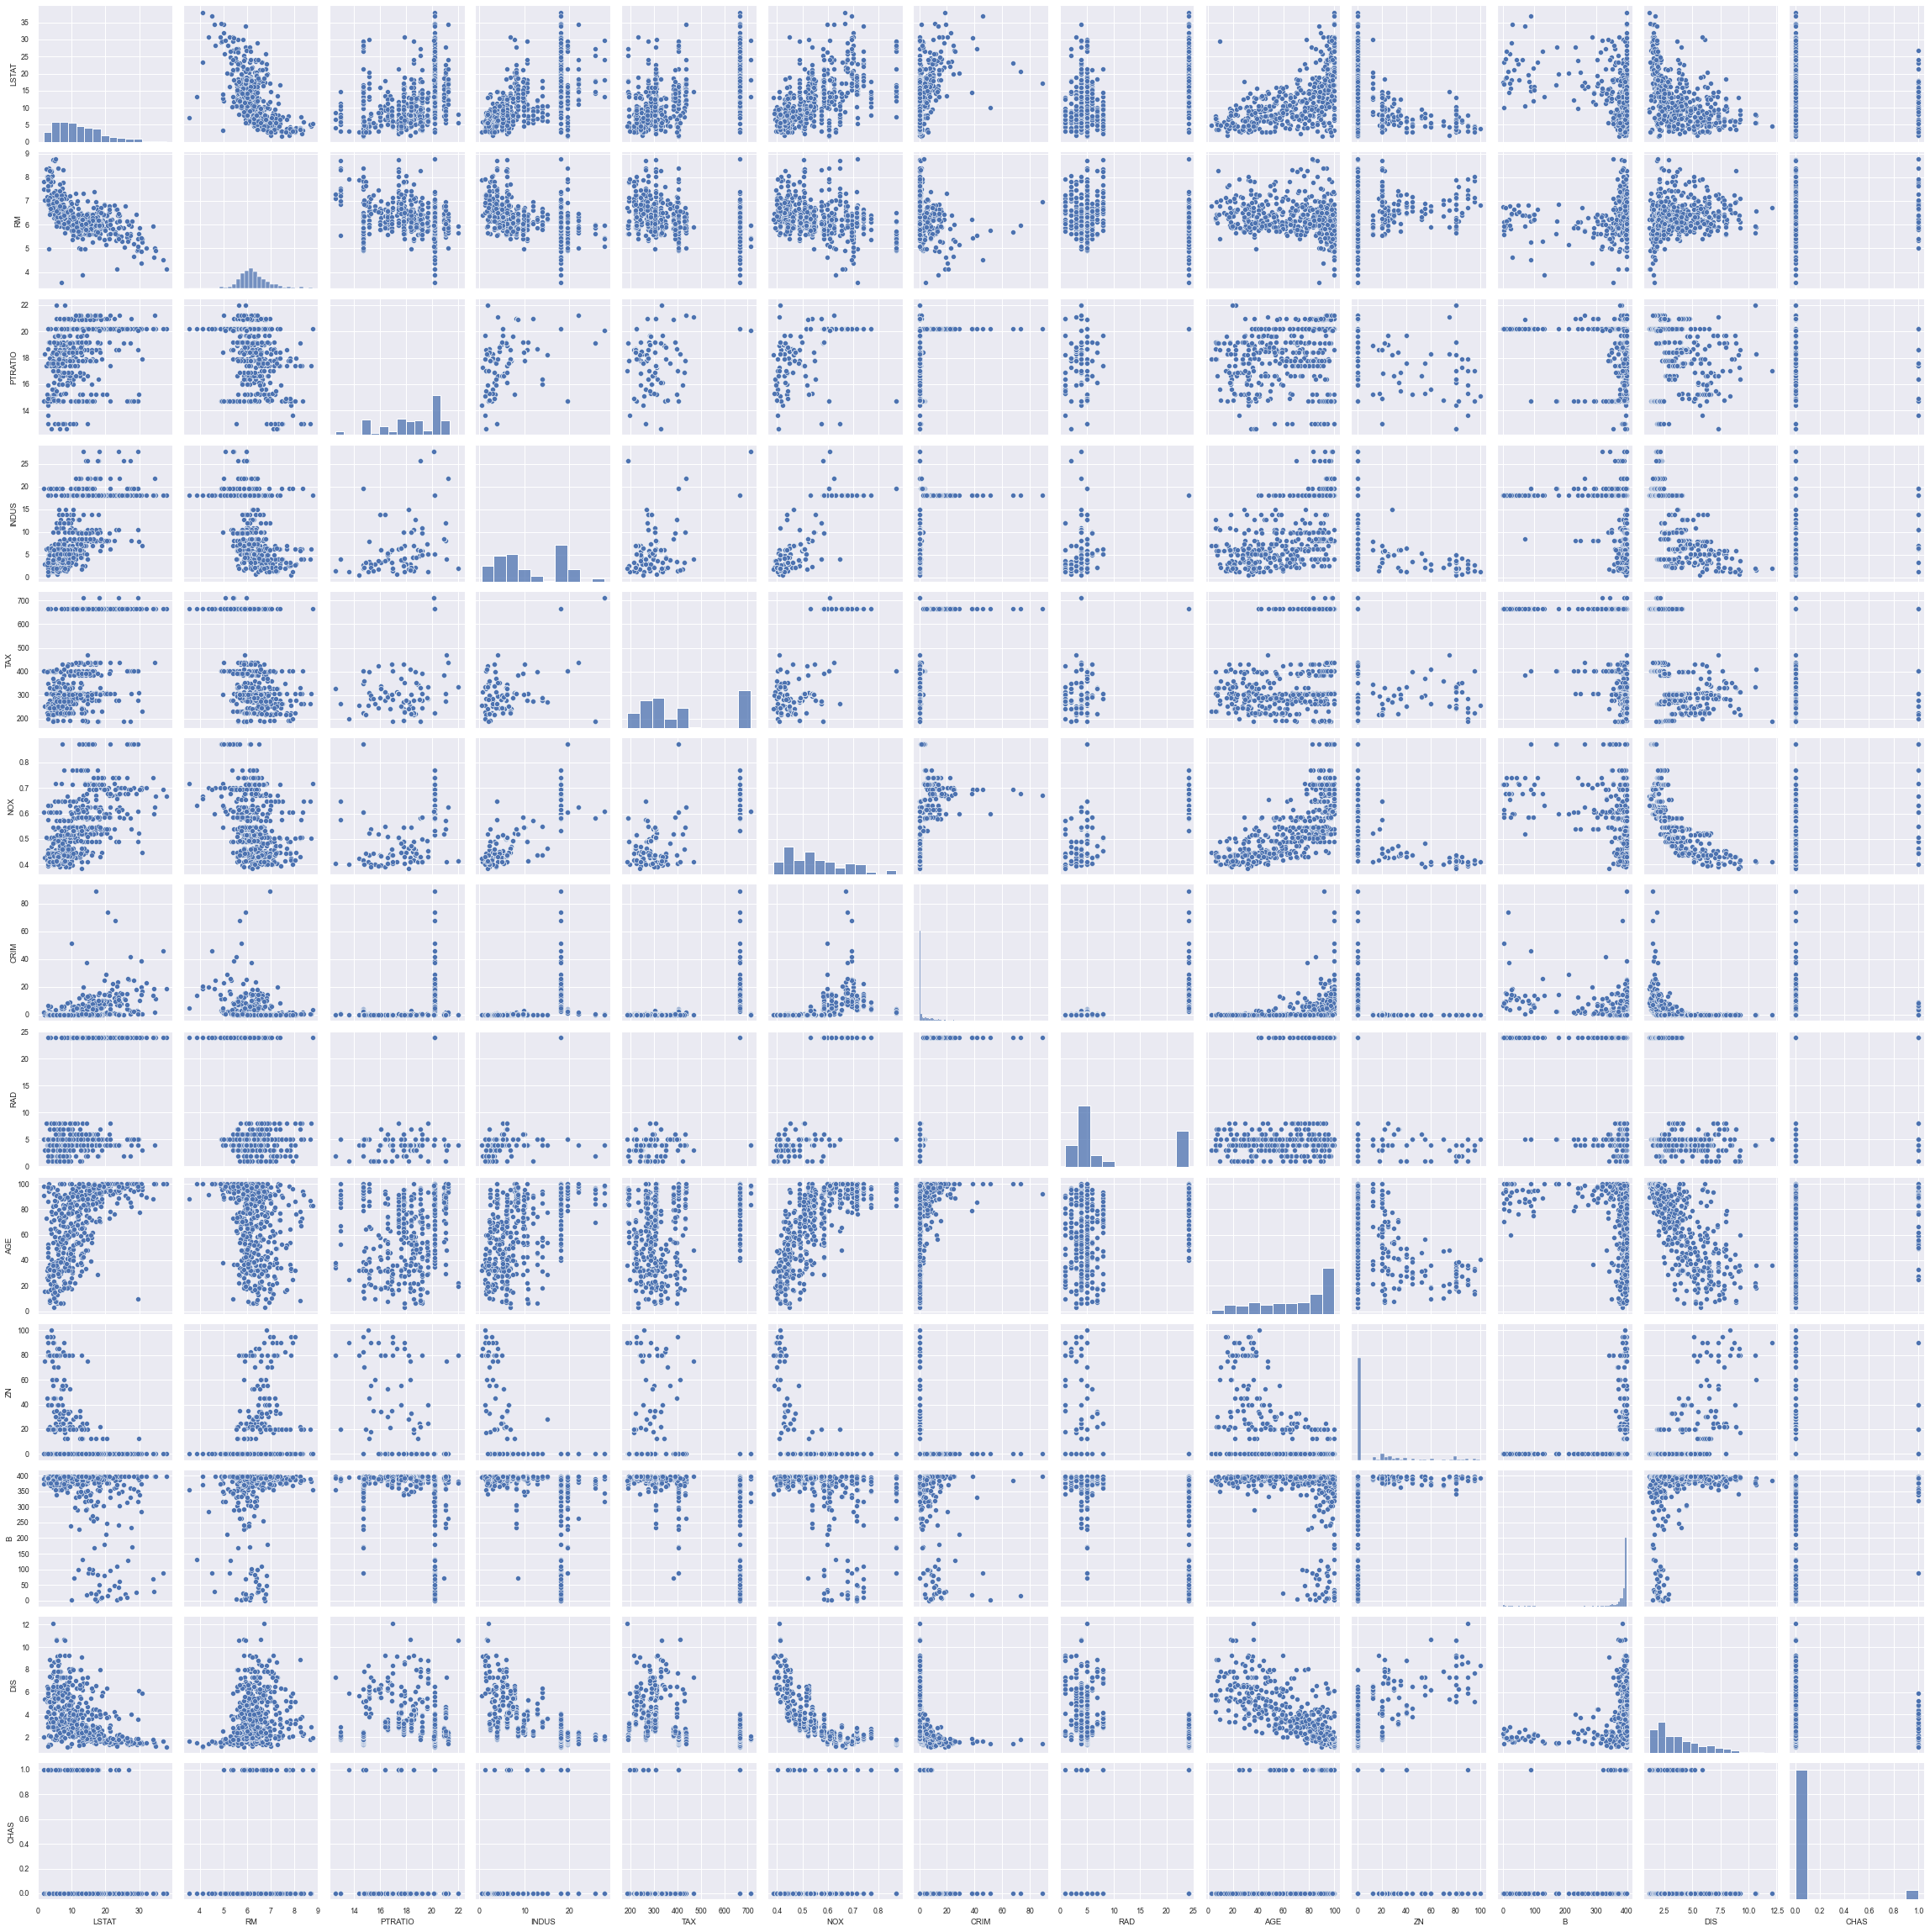

In [173]:
sns.pairplot(df[['LSTAT','RM','PTRATIO','INDUS','TAX','NOX','CRIM','RAD','AGE','ZN','B','DIS','CHAS']])

In [ ]:
# VIF
y, X = dmatrices('Price ~ LSTAT+RM+PTRATIO+INDUS+TAX+NOX+CRIM+RAD+AGE+ZN+B+DIS+CHAS',df,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_facotr(X.values, i )]